# Python Refresher

1. Datatypes
2. Data wrangling with __pandas__
3. Figures with __seaborn__
4. Spatial data with __geopandas__

### Setup

In [340]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import os

In [341]:
data_dir = "/Users/robmarty/Dropbox/World Bank/Trainings and Code Resources/LAMATA Workshop 2024/Data"

# If True, then the above path works
os.path.exists(data_dir)

True

### Data Types

__List__

In [342]:
# Make list
numbers = ['One', 'Two', 3, 4]

In [343]:
# Grab elements from list
numbers[0]

'One'

In [344]:
numbers[0:2]

['One', 'Two']

In [345]:
# Add items to a list
numbers.append(5)

print(numbers)

['One', 'Two', 3, 4, 5]


__Dictionary__

In [346]:
# Make dictionary
# 'key': 'value'
# Data from: https://www.worldometers.info/population/countries-in-africa-by-population/
population = {'Nigeria': 223804632,
              'Ethiopia': 126527060,
              'Egypt': 112716598,
              'DRC': 102262808}

In [347]:
# Grab items from dictionary
population['Nigeria']

223804632

In [348]:
# Add item to dictionary
population['Tanzania'] = 67438106

print(population)

{'Nigeria': 223804632, 'Ethiopia': 126527060, 'Egypt': 112716598, 'DRC': 102262808, 'Tanzania': 67438106}


__Tuple__

In [349]:
# Make tuple
values = (2, 3)

In [350]:
# Grab item from tuple
values[0]

2

### Pandas

Pandas is a primary tool in Python for wrangling data. [Here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) is a useful resource of main functions.

__Load data__

In [351]:
rtc_dir = os.path.join(data_dir, "Road Traffic Crashes", "Raw", "nigeria_rtc.csv")
rtc_df = pd.read_csv(rtc_dir)

__Explore Data__

In [352]:
# First 5 observations
rtc_df.head()

,state,fatal,serious,minor,total_cases,number_injured,number_killed,total_casuality,people_involved,year,quarter
0,Abia,10,19,1,30,146,31,177,279,2020,Q4
1,Adamawa,14,63,0,77,234,36,270,443,2020,Q4
2,Akwa Ibom,6,13,3,22,28,7,35,89,2020,Q4
3,Anambra,14,41,17,72,152,20,172,526,2020,Q4
4,Bauchi,45,108,1,154,685,90,775,1182,2020,Q4


In [353]:
# Last 5 observations
rtc_df.tail()

,state,fatal,serious,minor,total_cases,number_injured,number_killed,total_casuality,people_involved,year,quarter
217,Rivers,5,19,5,29,58,7,65,157,2022,Q1
218,Sokoto,8,17,2,27,103,13,116,231,2022,Q1
219,Taraba,14,56,1,71,248,32,280,420,2022,Q1
220,Yobe,17,9,0,26,133,63,196,272,2022,Q1
221,Zamfara,5,21,1,27,130,10,140,185,2022,Q1


In [354]:
# Number of rows
len(rtc_df)

222

In [355]:
# Tuple of # nrows, # columns
rtc_df.shape

(222, 11)

In [356]:
# of distinct values in a column
rtc_df['state'].nunique()

37

In [357]:
# Count number of rows with each unique value of a variable
rtc_df['year'].value_counts()

year
2021    148
2020     37
2022     37
Name: count, dtype: int64

In [358]:
# Basic descriptive statistics for each column
rtc_df.describe()

,fatal,serious,minor,total_cases,number_injured,number_killed,total_casuality,people_involved,year
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,22.405405,56.040541,10.225225,88.671171,261.572072,44.400901,305.972973,582.216216,2021.000000
std,18.902646,46.875624,16.200768,74.078013,206.973891,40.807423,243.343043,483.002729,0.578655
min,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,3.000000,3.000000,2020.000000
25%,9.000000,20.000000,1.000000,32.000000,119.000000,17.000000,137.250000,229.000000,2021.000000
50%,17.000000,44.000000,4.000000,67.000000,212.000000,32.000000,240.500000,419.500000,2021.000000
75%,31.000000,75.750000,11.000000,112.250000,346.250000,59.000000,405.750000,782.000000,2021.000000
max,104.000000,207.000000,90.000000,337.000000,1149.000000,224.000000,1345.000000,2234.000000,2022.000000


In [359]:
# Summarize values
rtc_df['total_cases'].sum()

19685

In [360]:
rtc_df['total_cases'].mean()

88.67117117117117

In [361]:
rtc_df['total_cases'].max()

337

__Exercise:__
1. How many distinct values are in the column `quarter`?
2. How many observations do we have for each quarter?
3. What is the total number of minor crashes?

__Make new columns__

In [362]:
rtc_df['fatal_or_serious'] = rtc_df['fatal'] + rtc_df['serious']

rtc_df.head()

,state,fatal,serious,minor,total_cases,number_injured,number_killed,total_casuality,people_involved,year,quarter,fatal_or_serious
0,Abia,10,19,1,30,146,31,177,279,2020,Q4,29
1,Adamawa,14,63,0,77,234,36,270,443,2020,Q4,77
2,Akwa Ibom,6,13,3,22,28,7,35,89,2020,Q4,19
3,Anambra,14,41,17,72,152,20,172,526,2020,Q4,55
4,Bauchi,45,108,1,154,685,90,775,1182,2020,Q4,153


__Apply Function__

In [363]:
# The str() function converts a variable to a string

str(1)

'1'

In [364]:
# We want to make a new year variable that is a string
rtc_df['year_str'] = rtc_df['year'].apply(str)

In [365]:
rtc_df['year_quarter'] = rtc_df['year_str'] + rtc_df['quarter']

__Rename Variables__

In [366]:
# {'variable': 'new_name'}
rtc_df = rtc_df.rename(columns = {'people_involved': 'n_involved'})

__Drop Variables__

In [367]:
rtc_df = rtc_df.drop(columns = ['number_injured'])

__Subset by rows__

In [368]:
# Just 2021 data
rtc_2021_df = rtc_df[rtc_df['year'] == 2021]

In [369]:
# 2020 and 2021
rtc_20_21_df = rtc_df[rtc_df['year'].isin([2020, 2021])]

In [370]:
# Filter by index; rows 10-20
rtc_10_20_df = rtc_df.iloc[10:20]

__Subset by columns__

In [371]:
rtc_fatal_df = rtc_df[['state', 'fatal']]

rtc_fatal_df.head()

,state,fatal
0,Abia,10
1,Adamawa,14
2,Akwa Ibom,6
3,Anambra,14
4,Bauchi,45


__Exercise__
1. Create a new variabel `n_injury` that adds the number of `fatal`, `serious`, and `minor` crashes.
2. Rename the variable `total_casuality` to `n_casuality`
3. Subset the dataset to `Lagos` and `Bauchi` in 2020; how many crashes occurred in both `Lagos` and `Bauchi` in 2020?

__Sort values__

In [372]:
rtc_df.sort_values('fatal').head()

,state,fatal,serious,minor,total_cases,number_killed,total_casuality,n_involved,year,quarter,fatal_or_serious,year_str,year_quarter
42,Bayelsa,0,6,1,7,0,15,29,2021,Q1,6,2021,2021Q1
5,Bayelsa,0,1,0,1,0,3,3,2020,Q4,1,2020,2020Q4
113,Akwa Ibom,1,8,4,13,1,19,75,2021,Q3,9,2021,2021Q3
190,Bayelsa,2,16,5,23,2,63,140,2022,Q1,18,2022,2022Q1
81,Borno,2,15,0,17,4,69,103,2021,Q2,17,2021,2021Q2


In [373]:
rtc_df.sort_values('fatal', ascending = False).head()

,state,fatal,serious,minor,total_cases,number_killed,total_casuality,n_involved,year,quarter,fatal_or_serious,year_str,year_quarter
55,Kaduna,104,147,5,256,196,1345,2151,2021,Q1,251,2021,2021Q1
92,Kaduna,94,126,2,222,217,1054,1790,2021,Q2,220,2021,2021Q2
18,Kaduna,93,175,13,281,224,1234,2234,2020,Q4,268,2020,2020Q4
203,Kaduna,82,106,9,197,197,1084,1818,2022,Q1,188,2022,2022Q1
101,Ogun,73,185,79,337,121,758,1980,2021,Q2,258,2021,2021Q2


__Exercise__
1. Sort the data by minor crashes; which state had the most minor crashes in one quarter?

__Group Data__

In [374]:
# Total fatal crashes by state
fatal_df = rtc_df.groupby('state')['fatal'].agg('sum').reset_index()

fatal_df.head()

,state,fatal
0,Abia,54
1,Adamawa,84
2,Akwa Ibom,34
3,Anambra,89
4,Bauchi,273


In [375]:
# Total fatal and serious crashes by state
fatal_serious_df = rtc_df.groupby('state')[['fatal', 'serious']].agg('sum').reset_index()
fatal_serious_df.head()

,state,fatal,serious
0,Abia,54,95
1,Adamawa,84,385
2,Akwa Ibom,34,63
3,Anambra,89,211
4,Bauchi,273,592


In [376]:
# Do the same thing, but make code more readable:
# Use \ to indicateo new line

fatal_serious_df = rtc_df.\
    groupby('state')[['fatal', 'serious']].\
    agg('sum').\
    reset_index()

fatal_serious_df.head()

,state,fatal,serious
0,Abia,54,95
1,Adamawa,84,385
2,Akwa Ibom,34,63
3,Anambra,89,211
4,Bauchi,273,592


In [377]:
# Use different aggregations
fatal_serious_df = rtc_df.\
    groupby('state').\
    agg({'fatal': 'mean',
         'serious': 'sum'}).\
    reset_index().\
    rename({'fatal': 'fatal_sum',
            'serious': 'serious_mean'})

fatal_serious_df.head()

,state,fatal,serious
0,Abia,9.000000,95
1,Adamawa,14.000000,385
2,Akwa Ibom,5.666667,63
3,Anambra,14.833333,211
4,Bauchi,45.500000,592


__Exercise__
1. Take the average number of fatal crashes across quarters. Which quarter tends to have the most crashes?

__Reshape__

In [378]:
# First, lets aggreate data
year_df = rtc_df.\
    groupby(['state', 'year'])['fatal'].\
    agg('mean').\
    reset_index()

In [379]:
# Make a dataset with years as columns
fatal_df = year_df.\
            pivot(index = 'state', columns='year', values='fatal').\
            reset_index()

fatal_df.head()

year,state,2020,2021,2022
0,Abia,10.0,9.00,8.0
1,Adamawa,14.0,13.25,17.0
2,Akwa Ibom,6.0,5.25,7.0
3,Anambra,14.0,15.00,15.0
4,Bauchi,45.0,47.00,40.0


__Exercise__
1. Reshape `year_df` so that each state is a separate column and the each year is a row.

### Plotting

We'll plot using seaborn. [Here](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf) is a useful resource for seaborn.

__Crashes over time__

In [380]:
year_df = rtc_df.\
    groupby('year_quarter')['fatal'].\
    agg('sum').\
    reset_index()

year_df.head()

,year_quarter,fatal
0,2020Q4,885
1,2021Q1,830
2,2021Q2,777
3,2021Q3,723
4,2021Q4,888


<Axes: xlabel='year_quarter', ylabel='fatal'>

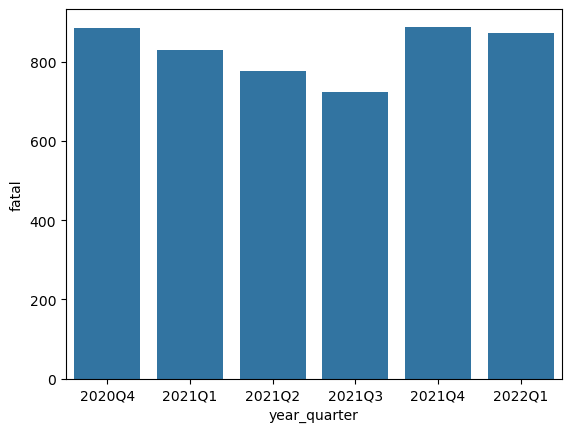

In [381]:
sns.barplot(data = year_df, x = 'year_quarter', y = 'fatal')

<Axes: xlabel='year_quarter', ylabel='fatal'>

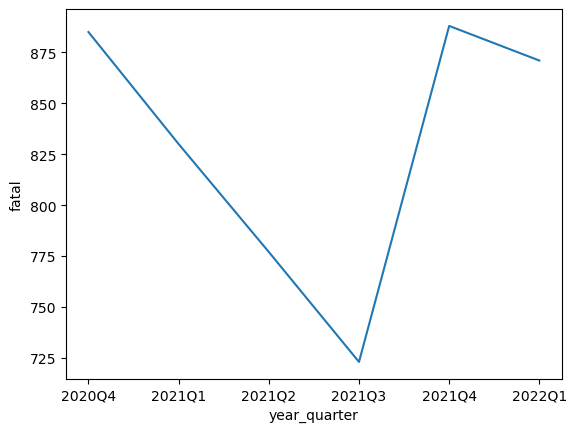

In [386]:
sns.lineplot(data = year_df, x = 'year_quarter', y = 'fatal')

__Exercise__
1. Make a bargraph showing that shows the total number of crashes for each state.

__Facet: Make plot showing trends in crashes for 8 states with most crashes__

In [387]:
# Dataframe of top states
top_states = rtc_df.\
    groupby('state')['fatal'].\
    agg('sum').\
    reset_index().\
    sort_values('fatal', ascending = False).\
    head(8)

top_states.head()

,state,fatal
18,Kaduna,491
27,Ogun,383
14,FCT,280
30,Oyo,276
26,Niger,275


In [388]:
# Dataset for plot
year_state_df = rtc_df.\
    groupby(['state', 'year_quarter'])['fatal'].\
    agg('sum').\
    reset_index()

year_state_df = year_state_df[year_state_df['state'].isin(top_states['state'])]

year_state_df.head()

,state,year_quarter,fatal
24,Bauchi,2020Q4,45
25,Bauchi,2021Q1,52
26,Bauchi,2021Q2,33
27,Bauchi,2021Q3,39
28,Bauchi,2021Q4,64


/Users/robmarty/miniforge3/envs/ox/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


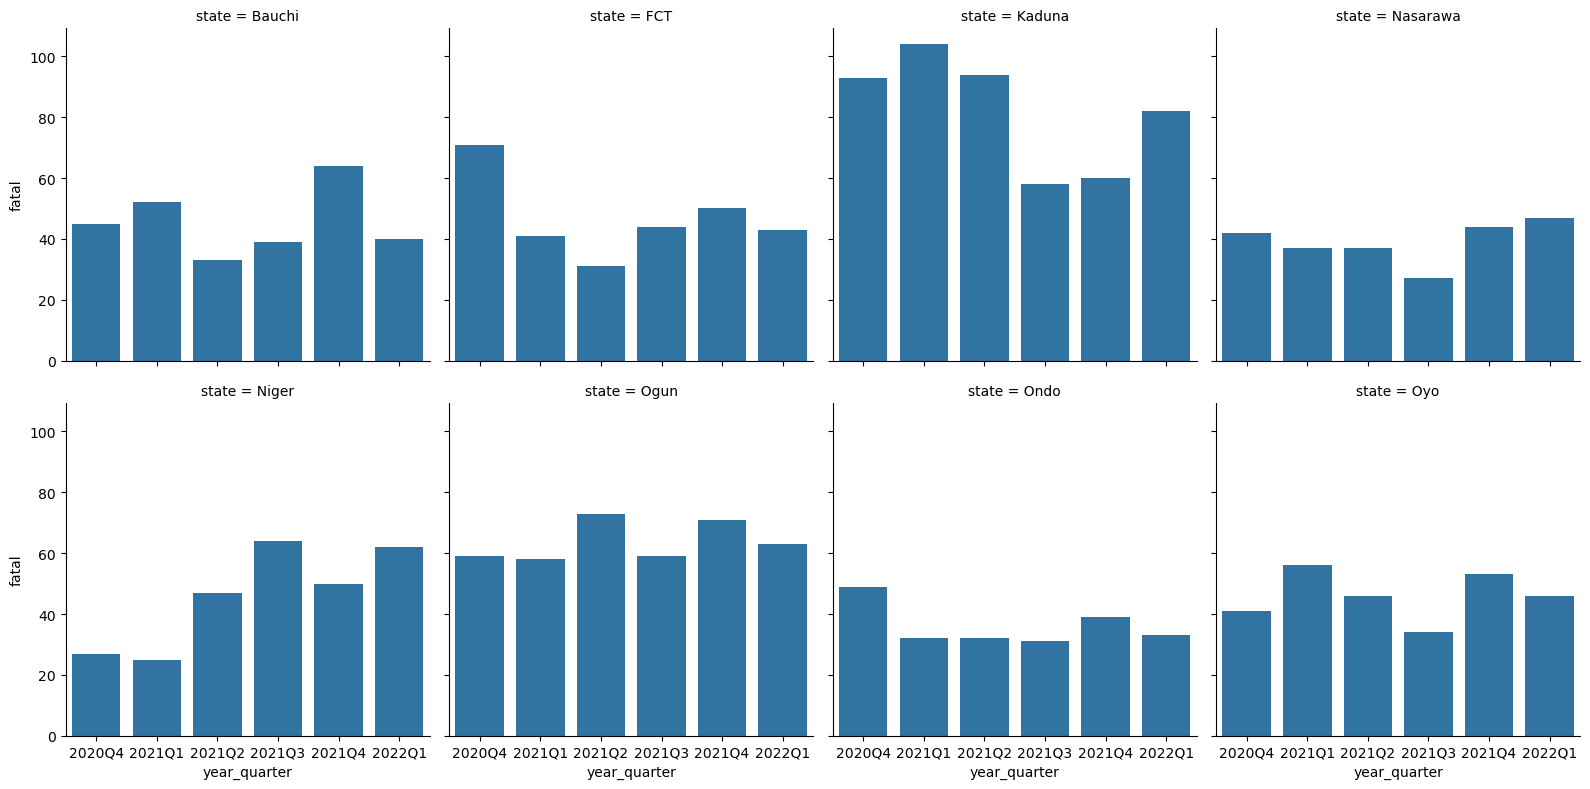

In [389]:
g = sns.FacetGrid(year_state_df, col='state', col_wrap=4, height=4, aspect=1)
g.map(sns.barplot, 'year_quarter', 'fatal')

__Exercise__
1. Make bar graph that shows the average number of crashes for each state (average across quarters); make one graph for each year.

### Geospatial Data

Geopandas is one of the main packages for geospatial analysis.

__Load data__

In [390]:
adm1_gdf = gpd.read_file(os.path.join(data_dir, 'GADM', 'Raw', 'nigeria_adm1.geojson'))

adm1_gdf.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Cross River,NG-CR,27671186B24287037233498,NGA,ADM1,"POLYGON ((8.27430 4.85474, 8.30239 4.84429, 8...."
1,Abuja Federal Capital Territory,NG-FC,27671186B68759235923182,NGA,ADM1,"POLYGON ((6.98081 8.44373, 7.03589 8.43971, 7...."
2,Ogun,NG-OG,27671186B80583952390127,NGA,ADM1,"POLYGON ((4.48324 6.32605, 4.48837 6.33622, 4...."
3,Oyo,NG-OY,27671186B24354382526150,NGA,ADM1,"POLYGON ((4.08836 7.13345, 4.08764 7.13805, 4...."
4,Sokoto,NG-SO,27671186B44691656482801,NGA,ADM1,"POLYGON ((4.12640 13.24967, 4.17857 13.25407, ..."


__Examine data__

In [391]:
adm1_gdf.shape

(37, 6)

In [392]:
adm1_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [393]:
adm1_gdf.explore()

### Map of crashes

In [394]:
adm1_gdf = adm1_gdf.rename(columns = {'shapeName': 'state'})

In [395]:
tf_state = adm1_gdf['state'].isin(state_df['state'])
tf_state.head()

0     True
1    False
2     True
3     True
4     True
Name: state, dtype: bool

In [396]:
adm1_gdf.loc[adm1_gdf['state'] == "Abuja Federal Capital Territory", 'state'] = 'FCT'

In [397]:
state_df = rtc_df.\
    groupby('state')['fatal'].\
    agg('sum').\
    reset_index()

adm1_rtc_gdf = adm1_gdf.merge(state_df, on = 'state')

In [398]:
adm1_rtc_gdf.explore(column = 'fatal')

__Compute Area__

In [399]:
# Need to project so that units are in meters
adm1_gdf['area'] = adm1_gdf.to_crs(32631).area

__Distance of each administrative region to Lagos__

<Axes: xlabel='dist_lagos', ylabel='Count'>

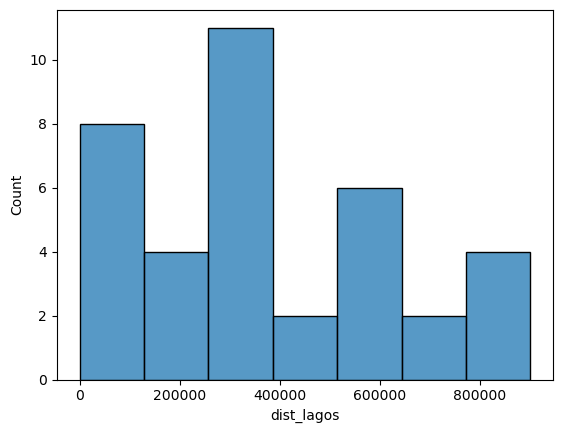

In [400]:
# Project so units are in meters
adm1_gdf_utm = adm1_gdf.to_crs(32631)

# Make dataframe of Lagos
adm1_gdf_utm_lagos = adm1_gdf_utm[adm1_gdf_utm['state'] == 'Lagos']

# Calculate distance
adm1_gdf_utm['dist_lagos'] = adm1_gdf_utm.distance(adm1_gdf_utm_lagos.iloc[0].geometry)

# Plot distance
sns.histplot(data = adm1_gdf_utm, x = "dist_lagos")

__Exercise__
1. Add a variable to `adm1_gdf_utm` that indicates the distance of each state to the state of `Niger`
2. Create a map that colors each adminsitrative unit with the distance to Niger